In [2]:
!pip install langchain_community langchain_groq langchain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.7/412.7 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.32
    Uninstalling langchain-core-0.3.32:
      Successfully uninstalled langchain-core-0.3.32


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


purchase_df = pd.read_csv("purchase_behaviour.csv")
transaction_df = pd.read_csv("transaction_data.csv")

df = transaction_df.merge(purchase_df, on="LYLTY_CARD_NBR", how="left")

top_products = df.groupby("PROD_NAME")["TOT_SALES"].sum().sort_values(ascending=False).head(3)
print("Top 3 Most Profitable Products:\n", top_products)
top_product_list = top_products.index.tolist()
profitable_customers = df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index()
most_profitable_segment = profitable_customers.sort_values(by="TOT_SALES", ascending=False).iloc[0]


most_profitable_lifestage = most_profitable_segment["LIFESTAGE"]
most_profitable_category = most_profitable_segment["PREMIUM_CUSTOMER"]
most_profitable_sales = most_profitable_segment["TOT_SALES"]

Top 3 Most Profitable Products:
 PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Name: TOT_SALES, dtype: float64


##Visualization

<ipython-input-5-a6ccda12a655>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")


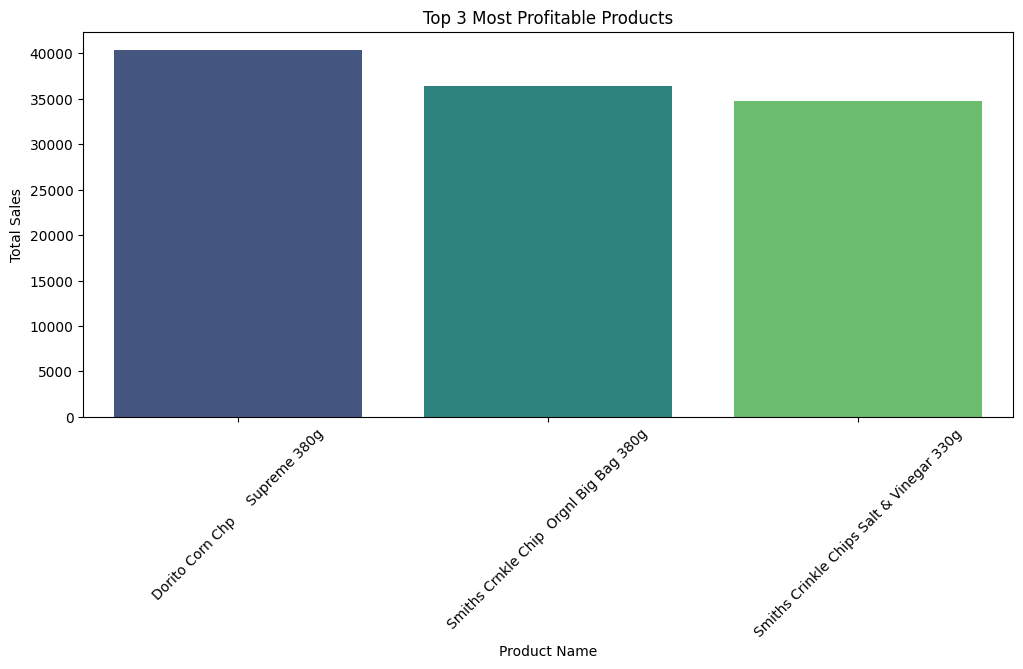

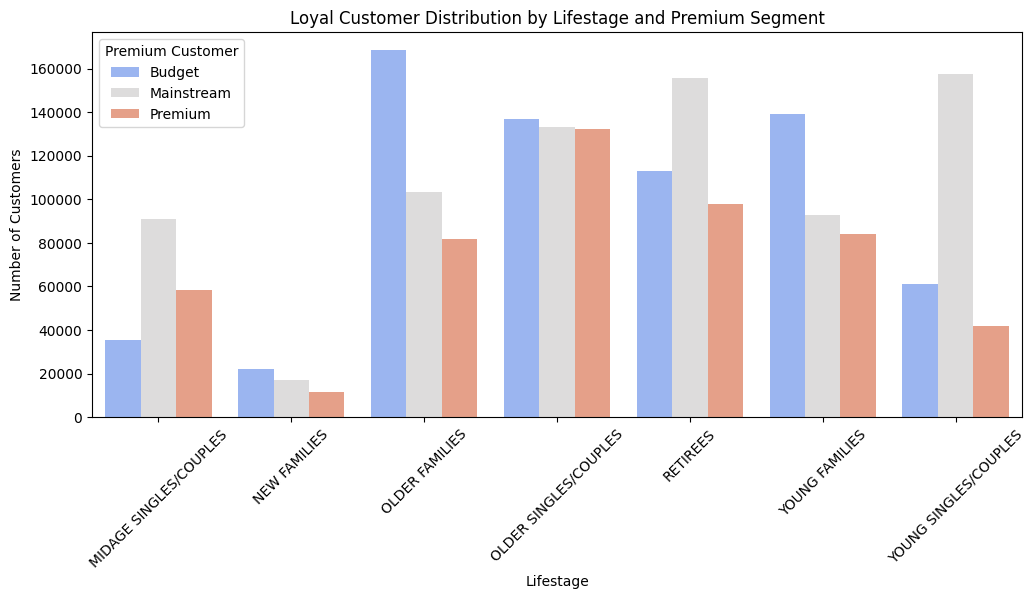

In [5]:
plt.figure(figsize=(12, 5))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.title("Top 3 Most Profitable Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(data=profitable_customers, x="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER", palette="coolwarm")
plt.title("Loyal Customer Distribution by Lifestage and Premium Segment")
plt.xlabel("Lifestage")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.legend(title="Premium Customer")
plt.show()

##Hypothesis Generation through LLM

In [6]:
from langchain_groq import ChatGroq
from langchain.schema import HumanMessage, SystemMessage
from google.colab import userdata
key = userdata.get('id2')

chat = ChatGroq(api_key= key ,model_name="llama-3.3-70b-versatile")

prompt = f"""
We have identified our most profitable customer segment: {most_profitable_lifestage}, {most_profitable_category}.
Additionally, our top 3 most profitable products are: {', '.join(top_product_list)}.

Based on this data, generate a hypothesis explaining why this customer segment is the most profitable.
Consider factors like spending habits, lifestyle preferences, and product demand.
"""

response = chat([SystemMessage(content="You are an expert marketing analyst."),
                 HumanMessage(content=prompt)])

print("\nGenerated Hypothesis:\n", response.content)

<ipython-input-6-c3e622605436>:16: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = chat([SystemMessage(content="You are an expert marketing analyst."),



Generated Hypothesis:
 Based on the data, here's a hypothesis explaining why OLDER FAMILIES, Budget, is the most profitable customer segment:

**Hypothesis:** OLDER FAMILIES, Budget, are the most profitable customer segment because they tend to prioritize value for money, have established household routines, and exhibit loyal purchasing behavior, which aligns with the affordable and familiar nature of the top 3 most profitable products (Dorito Corn Chips Supreme 380g, Smiths Crnkle Chip Original Big Bag 380g, and Smiths Crinkle Chips Salt & Vinegar 330g).

**Supporting factors:**

1. **Spending habits:** Older families on a budget are likely to be price-sensitive and seek value for money. They tend to prioritize essential items, such as food, and look for affordable options that meet their needs. The top 3 products, being affordable and offering a good balance of quality and price, resonate with this segment's spending habits.
2. **Lifestyle preferences:** Older families often have es